# **Prétraitement des Données 🔧**

## **🚀 Installation des packages nécessaires**

In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kafka-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## **📦 Imports essentiels**

In [7]:
import os
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkConf, SparkContext
import time
import seaborn as sns
import numpy as np
import findspark
from pyspark.sql.functions import col, lit, udf , year, avg, sum, to_date, mean, split, lag, expr,ntile, collect_list,when
from pyspark.sql.types import IntegerType, StringType, TimestampType, ArrayType, StructType, StructField
from kafka import KafkaProducer
import time
import plotly.express as px
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.window import Window
from pyspark.ml.clustering import KMeans
from transformers import pipeline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats import friedmanchisquare

## **🔥 Initialisation de Spark et création de la session et SparkContext**

In [8]:
import findspark
findspark.init()
try:
    spark.stop()
except:
    pass
conf = SparkConf() \
    .setAppName("Projet") \
    .setMaster("local[*]") \
    .set("spark.streaming.stopGracefullyOnShutdown", True) \
    .set('spark.jars.packages', 'org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.0') \
    .set("spark.sql.execution.arrow.enabled", "true") \
    .set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true") \
    .set("spark.sql.shuffle.partitions", "1000") \
    .set("spark.driver.memory", "8g") \
    .set("spark.executor.memory", "4g") \
    .set("spark.executor.instances", "2")

sc = SparkContext(conf=conf)
spark = SparkSession(sc)

spark

## **📥 Chargement du dataset**

In [9]:
df = pd.read_csv("Dataset/invoice_data.csv",sep=',')

/tmp/ipykernel_617/2072627702.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/invoice_data.csv",sep=',')


In [10]:
df

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


## **📝 Affichage des types de colonnes**

In [11]:
print(df.dtypes)

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object


## **🔍 Vérification des valeurs nulles**

In [12]:
print(df.isnull().sum())

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


## **🛠️ Certaines colonnes ne doivent pas être de type objet, donc j'ai créé cette fonction pour vérifier les types de données présents**

In [13]:
def Trouver_lestypes_de_données_dans_les_colonnes_object(df):
    types = {}
    for col in df.select_dtypes(include='object').columns:
        types_trouvé = df[col].apply(lambda x: type(x).__name__).unique()
        types[col] = types_trouvé

    return types

In [14]:
print(Trouver_lestypes_de_données_dans_les_colonnes_object(df))

{'client_id': array(['str'], dtype=object), 'invoice_date': array(['str'], dtype=object), 'counter_statue': array(['int', 'str'], dtype=object), 'counter_type': array(['str'], dtype=object)}


## **🕵️‍♂️ counter_statue contient des entiers et des strings, ce qui n'est pas normal, donc je dois vérifier les valeurs et les supprimer**

In [15]:
def Trouver_Les_Valeurs_Unique_Dans_Counter_Statue():
    unique_counter_statue = df['counter_statue'].unique()
    print("\nLes valeurs uniques dans counter statue : ")
    print(unique_counter_statue)
    return unique_counter_statue

In [16]:
unique_counter_statue = Trouver_Les_Valeurs_Unique_Dans_Counter_Statue()


Les valeurs uniques dans counter statue : 
[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]


In [17]:
def Supprimer_les_lignes_avec_les_valeurs_string_dans_counter_statue():
    unique_counter_statue_strings = [val for val in unique_counter_statue if isinstance(val, str)]
    df.drop(df[df['counter_statue'].isin(unique_counter_statue_strings)].index, inplace=True)

In [18]:
Supprimer_les_lignes_avec_les_valeurs_string_dans_counter_statue()

## **📑 Les colonnes objets doivent être converties en string ou en entier pour faciliter la manipulation**

In [19]:
def Convertir_les_colonnes_object_en_chaine_et_en_entier():
    df['client_id'] = df['client_id'].astype('string')
    df['invoice_date'] = pd.to_datetime(df['invoice_date']).astype('string')
    df['counter_statue'] = df['counter_statue'].astype('int')
    df['counter_type'] = df['counter_type'].astype('string')


In [20]:
Convertir_les_colonnes_object_en_chaine_et_en_entier()

In [21]:
print(df.dtypes)

client_id               string[python]
invoice_date            string[python]
tarif_type                       int64
counter_number                   int64
counter_statue                   int64
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type            string[python]
dtype: object


## **✂️ Supprimer les colonnes qui ne sont pas nécessaires**

In [22]:
colonnes = [
    'client_id',
    'counter_type'
]

df.drop(columns=colonnes, inplace=True)

In [23]:
df

,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4
1,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4
2,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4
3,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4
4,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8
4476745,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4
4476746,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4
4476747,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4


## **👀 J'ai voulu voir les valeurs uniques dans chaque colonne pour savoir quelles colonnes supprimer ces valeurs aberrantes**

In [24]:
colonnes_a_iterer = [
    'invoice_date', 'tarif_type', 'counter_number', 'counter_statue',
    'counter_code', 'reading_remarque', 'counter_coefficient', 'consommation_level_1',
    'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index',
    'new_index', 'months_number'
]

for colonne in colonnes_a_iterer:
    compteur = df[colonne].value_counts().reset_index()
    compteur.columns = [colonne, 'count']
    compteur = compteur.sort_values(by='count', ascending=False)
    print(f"Valeurs de comptage pour la colonne '{colonne}':\n", compteur, "\n")

Valeurs de comptage pour la colonne 'invoice_date':
      invoice_date  count
0      2019-03-09   4100
1      2017-03-10   3396
2      2017-05-09   3382
3      2017-02-06   3180
4      2017-03-05   3170
...           ...    ...
7514   1984-05-23      1
7515   1985-09-17      1
7516   1994-04-07      1
7517   1988-01-27      1
8259   1982-01-09      1

[8260 rows x 2 columns] 

Valeurs de comptage pour la colonne 'tarif_type':
     tarif_type    count
0           11  2660464
1           40  1369447
2           10   274053
3           15    71854
4           45    17373
5           13    11632
6           14    11587
7           12    11325
8           29    10080
9            9     5972
10          21      104
11           8       40
12          30       35
13          24        9
14          18        4
15          42        1
16          27        1 

Valeurs de comptage pour la colonne 'counter_number':
         counter_number  count
0                    0  42991
1                 27

In [25]:
def dataset_sans_valeurs_aberrant(df,colonne):
    q1 = df[colonne].quantile(0.25)
    q2 = df[colonne].quantile(0.75)
    q3 = q2 - q1
    lower_quantile = q1 - 1.5 * q3
    upper_quantile = q2 + 1.5 * q3
    return df[(df[colonne] >= lower_quantile) & (df[colonne] <= upper_quantile)]

In [26]:
df = dataset_sans_valeurs_aberrant(df, 'reading_remarque')
df = dataset_sans_valeurs_aberrant(df, 'months_number')
df = dataset_sans_valeurs_aberrant(df, 'counter_coefficient')
df = dataset_sans_valeurs_aberrant(df, 'counter_number')

In [27]:
df

,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4
1,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4
2,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4
3,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4
8,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476743,2019-11-06,11,262195,0,207,9,1,578,0,0,0,8505,9083,4
4476745,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4
4476746,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4
4476747,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4


In [28]:
colonnes_a_iterer = [
    'invoice_date', 'tarif_type', 'counter_number', 'counter_statue',
    'counter_code', 'reading_remarque', 'counter_coefficient', 'consommation_level_1',
    'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index',
    'new_index', 'months_number'
]

for colonne in colonnes_a_iterer:
    compteur = df[colonne].value_counts().reset_index()
    compteur.columns = [colonne, 'count']
    compteur = compteur.sort_values(by='count', ascending=False)
    print(f"Valeurs de comptage pour la colonne '{colonne}':\n", compteur, "\n")

Valeurs de comptage pour la colonne 'invoice_date':
      invoice_date  count
0      2017-04-24   2136
1      2017-02-01   2049
2      2015-04-28   2006
3      2015-08-24   1957
4      2016-08-25   1936
...           ...    ...
6298   1993-05-27      1
6299   1980-06-17      1
6300   1980-10-16      1
6301   1992-11-08      1
6907   1993-03-08      1

[6908 rows x 2 columns] 

Valeurs de comptage pour la colonne 'tarif_type':
     tarif_type    count
0           11  2092019
1           40   703069
2           10   188852
3           15    46070
4           29     6894
5           13     5641
6           14     5602
7           12     5531
8            9     2618
9           45      122
10          21       51
11          24        8
12          18        3 

Valeurs de comptage pour la colonne 'counter_number':
         counter_number  count
0                    0  35116
1                 2840    155
2                 1081    154
3                  740    147
4                59558    

# **Visualisation des Données 📊**

## **📈 Voici des plots pour voir les distributions des niveaux de consommations**

In [29]:
colonnes = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']

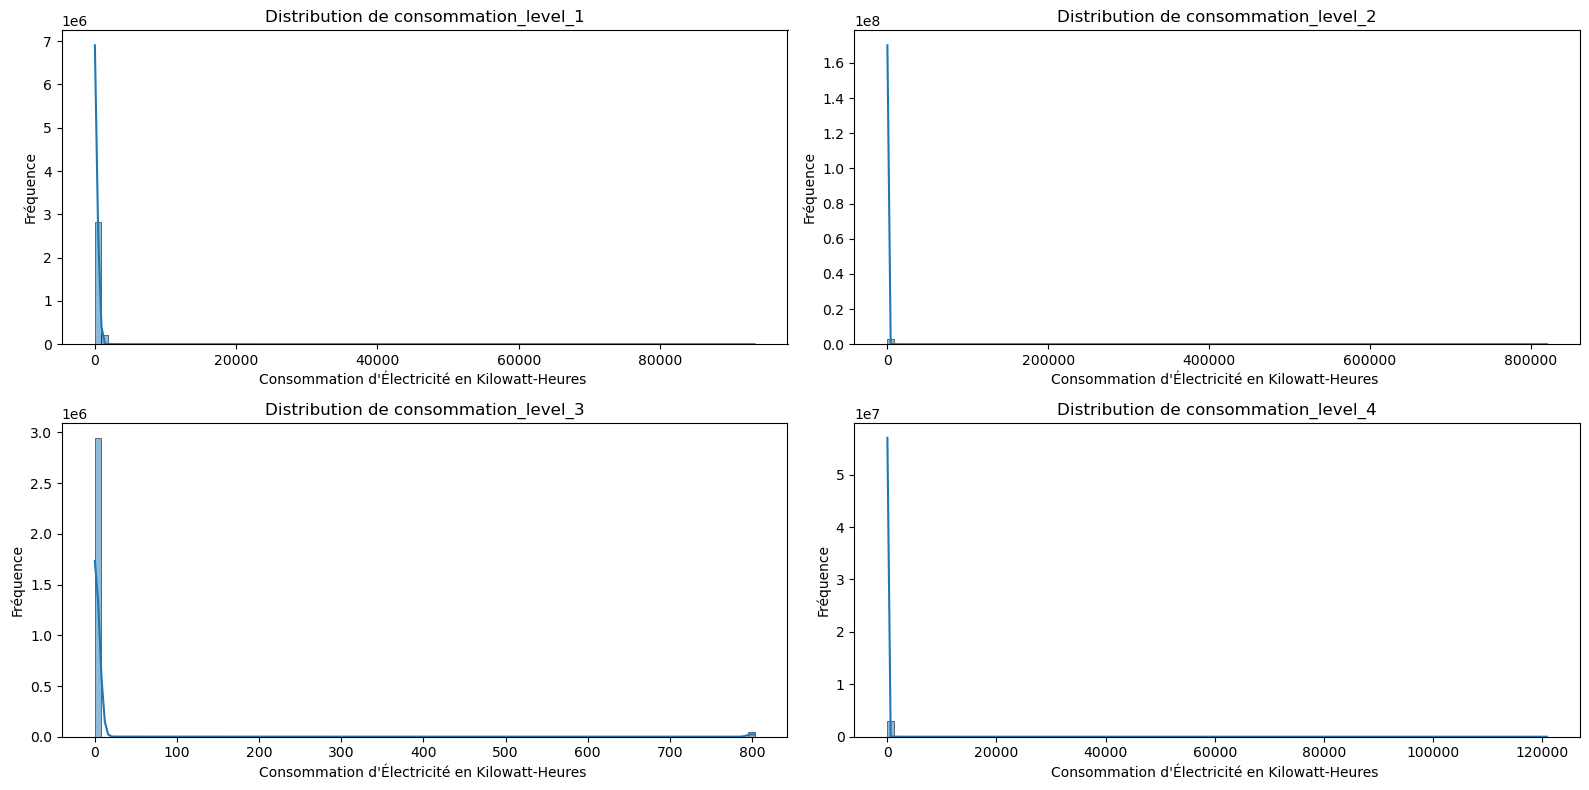

In [30]:
num_columns = len(colonnes)
rows = (num_columns + 1) // 2


fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows))
axes = axes.flatten()


for i, colonne in enumerate(colonnes):
    sns.histplot(df[colonne], kde=True, ax=axes[i], bins=100)
    axes[i].set_title(f'Distribution de {colonne}')
    axes[i].set_yscale('linear')
    axes[i].set_xlabel("Consommation d'Électricité en Kilowatt-Heures ")
    axes[i].set_ylabel('Fréquence')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


## **📉 Voici une boxplot pour voir les valeurs aberrantes des consommations**

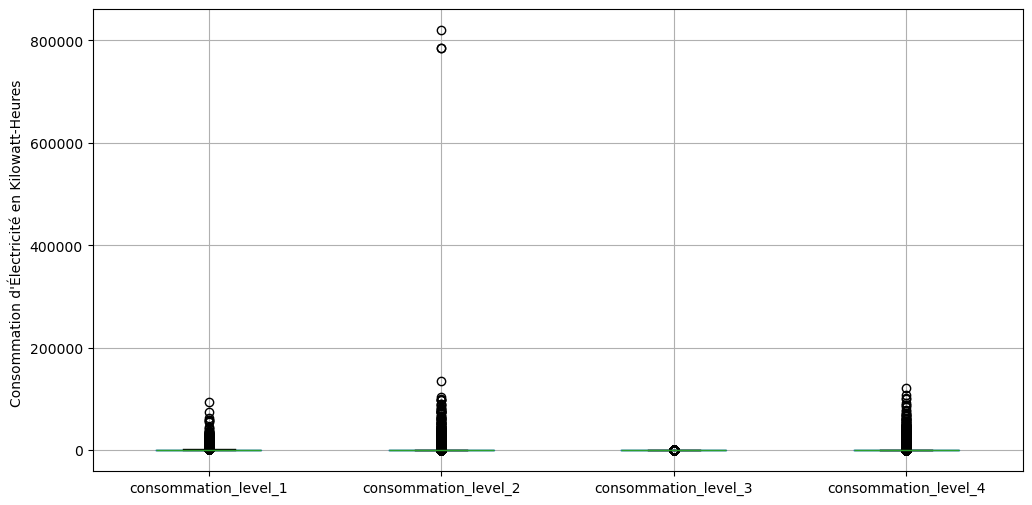

In [31]:
plt.figure(figsize=(12, 6))
df.boxplot(column=colonnes)
plt.ylabel("Consommation d'Électricité en Kilowatt-Heures ")
plt.yscale('linear')
plt.show()

In [32]:
df

,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4
1,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4
2,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4
3,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4
8,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476743,2019-11-06,11,262195,0,207,9,1,578,0,0,0,8505,9083,4
4476745,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4
4476746,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4
4476747,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3056480 entries, 0 to 4476748
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   invoice_date          string
 1   tarif_type            int64 
 2   counter_number        int64 
 3   counter_statue        int64 
 4   counter_code          int64 
 5   reading_remarque      int64 
 6   counter_coefficient   int64 
 7   consommation_level_1  int64 
 8   consommation_level_2  int64 
 9   consommation_level_3  int64 
 10  consommation_level_4  int64 
 11  old_index             int64 
 12  new_index             int64 
 13  months_number         int64 
dtypes: int64(13), string(1)
memory usage: 349.8 MB


# **Travail avec Spark ⚡**

## **🗃️ Création de DataFrame Spark à partir de DataFrame Pandas**

In [34]:
df_spark = spark.createDataFrame(df)

## **📅 Conversion de la colonne de date de string à date pour l'utiliser dans le travail**

In [35]:
df_spark = df_spark.withColumn('invoice_date', to_date(col('invoice_date'), 'yyyy-MM-dd'))

In [36]:
df_spark.printSchema()

root
 |-- invoice_date: date (nullable = true)
 |-- tarif_type: long (nullable = true)
 |-- counter_number: long (nullable = true)
 |-- counter_statue: long (nullable = true)
 |-- counter_code: long (nullable = true)
 |-- reading_remarque: long (nullable = true)
 |-- counter_coefficient: long (nullable = true)
 |-- consommation_level_1: long (nullable = true)
 |-- consommation_level_2: long (nullable = true)
 |-- consommation_level_3: long (nullable = true)
 |-- consommation_level_4: long (nullable = true)
 |-- old_index: long (nullable = true)
 |-- new_index: long (nullable = true)
 |-- months_number: long (nullable = true)



## **🔧 Utilisation de la librairie Spark ML pour une régression linéaire pour prédire la consommation**

In [37]:
windowSpec = Window.partitionBy("counter_number").orderBy("invoice_date")

In [38]:
for i in range(1, 5):
    df_spark = df_spark.withColumn(f'consommation_level_1_lag_{i}', lag('consommation_level_1', i).over(windowSpec))
    df_spark = df_spark.withColumn(f'consommation_level_2_lag_{i}', lag('consommation_level_2', i).over(windowSpec))
    df_spark = df_spark.withColumn(f'consommation_level_3_lag_{i}', lag('consommation_level_3', i).over(windowSpec))
    df_spark = df_spark.withColumn(f'consommation_level_4_lag_{i}', lag('consommation_level_4', i).over(windowSpec))

In [39]:
assembler = VectorAssembler(inputCols=[
    'counter_coefficient',
    'consommation_level_1_lag_1',
    'consommation_level_2_lag_1',
    'consommation_level_3_lag_1',
    'consommation_level_4_lag_1',
    'old_index',
    'new_index',
    'months_number'
], outputCol='features', handleInvalid="skip")

In [40]:
data = assembler.transform(df_spark)

In [41]:
lr_level_1 = LinearRegression(featuresCol='features', labelCol='consommation_level_1')
lr_level_2 = LinearRegression(featuresCol='features', labelCol='consommation_level_2')
lr_level_3 = LinearRegression(featuresCol='features', labelCol='consommation_level_3')
lr_level_4 = LinearRegression(featuresCol='features', labelCol='consommation_level_4')
model_level_1 = lr_level_1.fit(data)
model_level_2 = lr_level_2.fit(data)
model_level_3 = lr_level_3.fit(data)
model_level_4 = lr_level_4.fit(data)

In [42]:
client_counter_number = 1335667
client_data = df_spark.filter(df_spark.counter_number == client_counter_number).orderBy(col("invoice_date").desc()).limit(1)
client_features = assembler.transform(client_data)

In [43]:
next_prediction_level_1 = model_level_1.transform(client_features).select("prediction").collect()[0][0]
next_prediction_level_2 = model_level_2.transform(client_features).select("prediction").collect()[0][0]
next_prediction_level_3 = model_level_3.transform(client_features).select("prediction").collect()[0][0]
next_prediction_level_4 = model_level_4.transform(client_features).select("prediction").collect()[0][0]

print(f"Prediction consommation_level_1: {next_prediction_level_1}")
print(f"Prediction consommation_level_2: {next_prediction_level_2}")
print(f"Prediction consommation_level_3: {next_prediction_level_3}")
print(f"Prediction consommation_level_4: {next_prediction_level_4}")

Prediction consommation_level_1: 230.31977696534932
Prediction consommation_level_2: 42.68558357636357
Prediction consommation_level_3: 7.809714349226123
Prediction consommation_level_4: 18.872470349435016


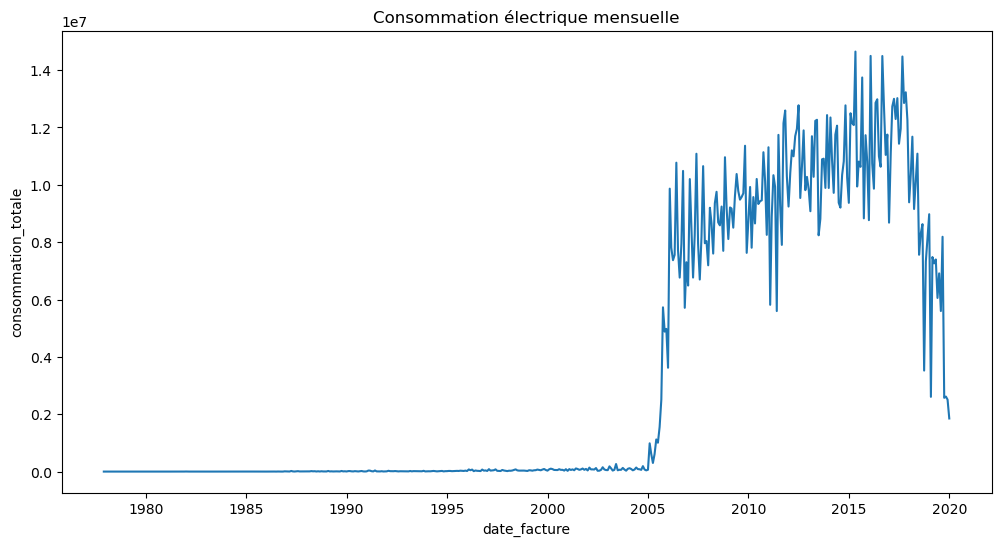

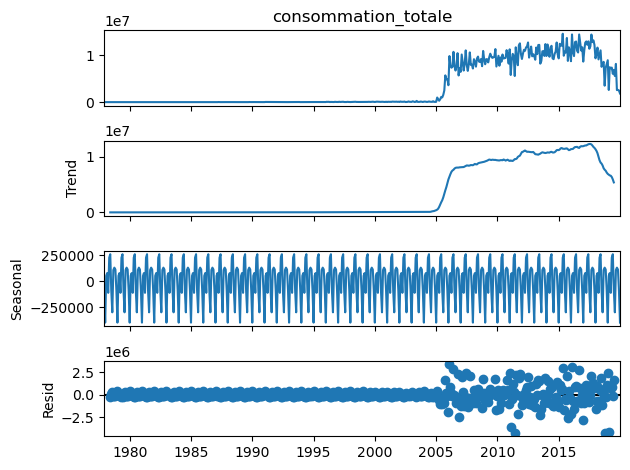

Statistique du test de Friedman: 487.73227691318573
p-value: 3.0491488769224666e-77


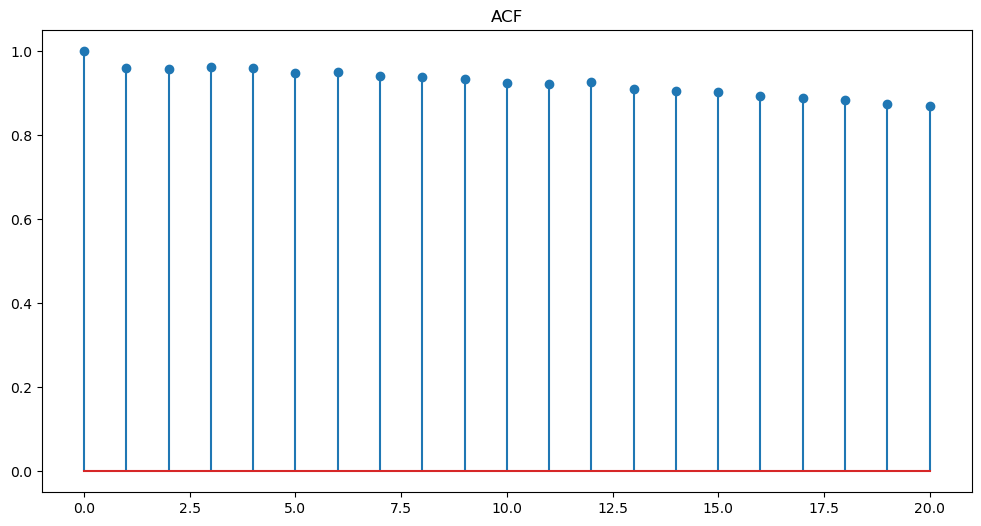

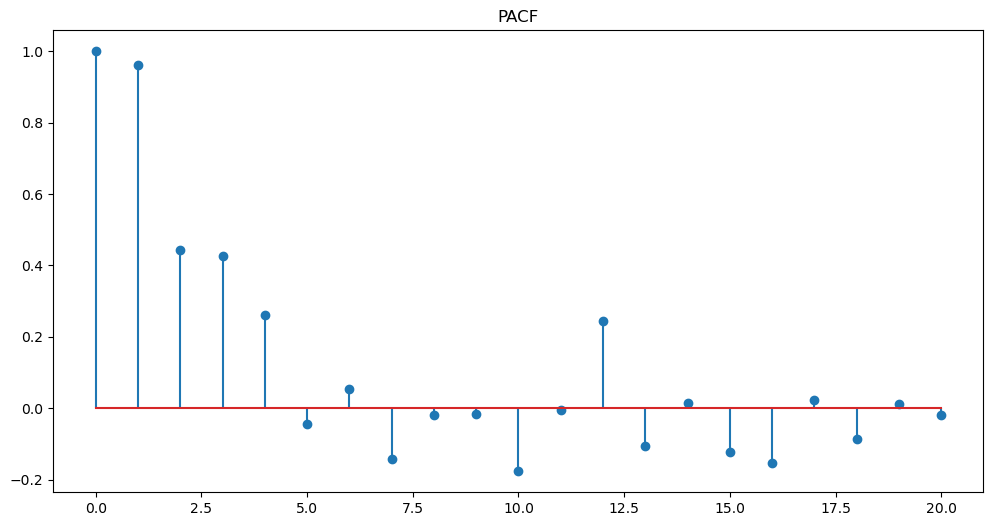

Statistique ADF: -1.475101156668075
p-value: 0.5457905266273897
Valeurs critiques:
	1%: -3.444
	5%: -2.867
	10%: -2.570
                                SARIMAX Results                                
Dep. Variable:     consommation_totale   No. Observations:                  506
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -7720.434
Date:                 Sat, 21 Sep 2024   AIC                          15446.868
Time:                         14:22:15   BIC                          15459.541
Sample:                     11-30-1977   HQIC                         15451.839
                          - 12-31-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1186      0.037     -3.176      0.001      -0.192      -0.045
ma.

<Figure size 1200x800 with 0 Axes>

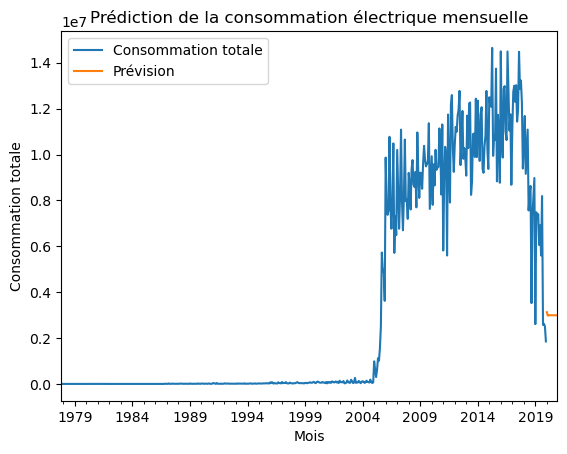

In [44]:
df['date_facture'] = pd.to_datetime(df['invoice_date'])
df = df.sort_values('date_facture')

df['consommation_totale'] = df['consommation_level_1'] + df['consommation_level_2'] + df['consommation_level_3'] + df['consommation_level_4']

mensuel_df = df.resample('M', on='date_facture').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mensuel_df, x=mensuel_df.index, y='consommation_totale')
plt.title('Consommation électrique mensuelle')
plt.show()

resultat_mensuel = seasonal_decompose(mensuel_df['consommation_totale'], model='additive')
resultat_mensuel.plot()
plt.show()

df['annee'] = df['date_facture'].dt.year
df['mois'] = df['date_facture'].dt.month

donnees_mensuelles = df.pivot_table(values='consommation_totale', index='mois', columns='annee', aggfunc='sum')

donnees_mensuelles = donnees_mensuelles.fillna(0)


friedman_test = friedmanchisquare(*[donnees_mensuelles[annee].values for annee in donnees_mensuelles.columns])
print('Statistique du test de Friedman:', friedman_test.statistic)
print('p-value:', friedman_test.pvalue)

lag_acf = acf(mensuel_df['consommation_totale'], nlags=20)
lag_pacf = pacf(mensuel_df['consommation_totale'], nlags=20, method='ols')

plt.figure(figsize=(12, 6))
plt.stem(lag_acf)
plt.title('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plt.stem(lag_pacf)
plt.title('PACF')
plt.show()


adf_result = adfuller(mensuel_df['consommation_totale'])
print('Statistique ADF:', adf_result[0])
print('p-value:', adf_result[1])
print('Valeurs critiques:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value:.3f}')

modele = ARIMA(mensuel_df['consommation_totale'], order=(1, 1, 1))
modele_fit = modele.fit()

print(modele_fit.summary())

residus = modele_fit.resid
test_lb = sm.stats.acorr_ljungbox(residus, lags=[10], return_df=True)
print('Test de Ljung-Box:')
print(test_lb)

nb_periodes = 12
previsions = modele_fit.get_forecast(steps=nb_periodes)
index_previsions = pd.date_range(start=mensuel_df.index[-1] + pd.offsets.MonthBegin(), periods=nb_periodes, freq='M')
previsions_df = previsions.summary_frame()
previsions_df['date_facture'] = index_previsions
previsions_df = previsions_df.set_index('date_facture')

combine_df = pd.concat([mensuel_df[['consommation_totale']], previsions_df[['mean']]], axis=1)
combine_df.columns = ['consommation_totale', 'prevision']

print('Prévisions pour les prochaines périodes:')
print(previsions_df)

plt.figure(figsize=(12, 8))
combine_df.plot()
plt.title('Prédiction de la consommation électrique mensuelle')
plt.xlabel('Mois')
plt.ylabel('Consommation totale')
plt.legend(['Consommation totale', 'Prévision'])
plt.show()

## **🕵️‍♀️ Utilisation de Isolation Forest pour trouver les anomalies dans la consommation**

In [45]:
colonnes_consommation = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']

In [46]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomalie'] = iso_forest.fit_predict(df[colonnes_consommation])

In [47]:
anomalies = df[df['anomalie'] == -1]

In [48]:
anomalies
anomalies.iloc[0:5].to_csv('/mnt/data/anomalies.csv', index=False)

## **📊 Segmenter les clients selon leur consommation (2019) en 3 groupes en utilisant deux méthodes : percentiles et k-means**

In [49]:
df_2019 = df_spark.filter(year(col("invoice_date")) == 2019)

In [50]:
df_total_consumption_2019 = df_2019.groupBy("counter_number").agg(
    (sum("consommation_level_1") +
     sum("consommation_level_2") +
     sum("consommation_level_3") +
     sum("consommation_level_4")).alias("total_consommation")
)

In [51]:
window_spec = Window.orderBy("total_consommation")

In [52]:
df_with_percentiles_2019 = df_total_consumption_2019.withColumn("percentile", ntile(100).over(window_spec))

In [53]:
df_seg_2019 = df_with_percentiles_2019.withColumn(
    "groupe_consommation",
    expr("CASE WHEN percentile <= 33 THEN 'faible' " +
         "WHEN percentile <= 66 THEN 'moyenne' " +
         "ELSE 'elevee' END")
)

df_seg_2019 = df_seg_2019.orderBy(col("total_consommation").desc())

In [54]:
df_seg_2019.select("counter_number", "total_consommation", "groupe_consommation").show()

+--------------+------------------+-------------------+
|counter_number|total_consommation|groupe_consommation|
+--------------+------------------+-------------------+
|        614015|             70791|             elevee|
|          7122|             55067|             elevee|
|       1766094|             49551|             elevee|
|        632424|             49322|             elevee|
|             0|             47329|             elevee|
|          1585|             40345|             elevee|
|        573414|             40321|             elevee|
|          2840|             37995|             elevee|
|          1630|             37822|             elevee|
|        562094|             35829|             elevee|
|        165082|             34252|             elevee|
|        616576|             33714|             elevee|
|        130963|             32332|             elevee|
|        310812|             31271|             elevee|
|        751158|             30651|             

In [55]:
df_2019 = df_spark.filter(year(col("invoice_date")) == 2019)

In [56]:
df_total_consumption_2019 = df_2019.groupBy("counter_number").agg(
    (sum("consommation_level_1") +
     sum("consommation_level_2") +
     sum("consommation_level_3") +
     sum("consommation_level_4")).alias("total_consommation")
)

In [57]:
assembler = VectorAssembler(inputCols=["total_consommation"], outputCol="features")
df_features = assembler.transform(df_total_consumption_2019)

In [58]:
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(df_features)
df_clusters = model.transform(df_features)

In [59]:
df_clusters = df_clusters.withColumn(
    "groupe_consommation",
    when(col("prediction") == 0, "faible")
    .when(col("prediction") == 1, "moyenne")
    .otherwise("elevee")
)

In [60]:
df_final = df_clusters.groupBy("groupe_consommation").agg(
    collect_list("counter_number").alias("counter_numbers")
)

In [61]:
df_final = df_final.withColumn("counter_numbers", expr("slice(counter_numbers, 1, 10)"))

df_final.select("groupe_consommation", "counter_numbers").show(truncate=False)

+-------------------+---------------------------------------------------------------------------------+
|groupe_consommation|counter_numbers                                                                  |
+-------------------+---------------------------------------------------------------------------------+
|moyenne            |[553461, 728895, 616576, 177, 28107, 166802, 89780, 579836, 100524, 11608]       |
|faible             |[374544, 47186, 392222, 223934, 1371977, 1158460, 389654, 639555, 68798, 1101234]|
|elevee             |[37494, 57639, 1148070, 64362, 1124315, 65758, 143887, 153955, 24909, 429361]    |
+-------------------+---------------------------------------------------------------------------------+



## **⏱️ Utilisation des méthodes d'optimisation de temps d'exécution avec Spark**

In [62]:

start = time.time()
df_yearly = df_spark.groupBy(year("invoice_date").alias("year")).agg(
    avg("consommation_level_1").alias("mean_consommation_level_1"),
    avg("consommation_level_2").alias("mean_consommation_level_2"),
    avg("consommation_level_3").alias("mean_consommation_level_3")
)
end = time.time()

temps4 = end - start
print(temps4)

0.06229114532470703


In [63]:
df_spark.cache()
start = time.time()
df_yearly = df_spark.groupBy(year("invoice_date").alias("year")).agg(
    avg("consommation_level_1").alias("mean_consommation_level_1"),
    avg("consommation_level_2").alias("mean_consommation_level_2"),
    avg("consommation_level_3").alias("mean_consommation_level_3")
)
end = time.time()
df_spark.unpersist()
temps5 = end - start
print(temps5)

0.02726292610168457


In [64]:
start = time.time()
df_spark = df_spark.repartition(15)
df_yearly = df_spark.groupBy(year("invoice_date").alias("year")).agg(
    avg("consommation_level_1").alias("mean_consommation_level_1"),
    avg("consommation_level_2").alias("mean_consommation_level_2"),
    avg("consommation_level_3").alias("mean_consommation_level_3")
)
end = time.time()
temps6 = end - start
print(temps6)

0.040760040283203125


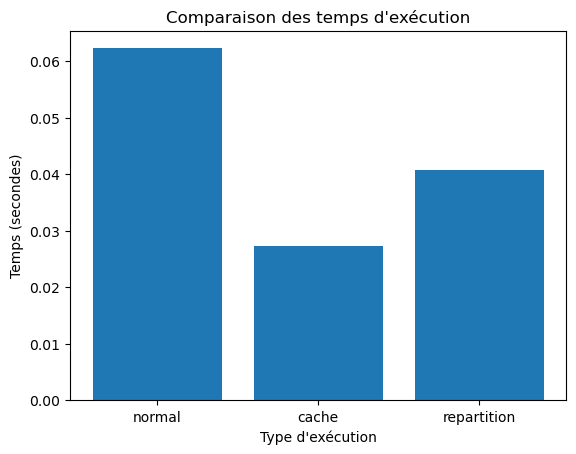

In [65]:
temps_exec = [temps4, temps5, temps6]
etiquettes = ['normal', 'cache', 'repartition']
plt.bar(etiquettes, temps_exec)
plt.title('Comparaison des temps d\'exécution')
plt.xlabel('Type d\'exécution')
plt.ylabel('Temps (secondes)')

plt.show()

In [66]:
df_yearly = df_yearly.toPandas()

In [67]:
df_yearly = df_yearly.sort_values(by='year')

In [68]:
df_yearly

,year,mean_consommation_level_1,mean_consommation_level_2,mean_consommation_level_3
42,1977,61.000000,0.000000,0.000000
40,1978,111.000000,0.000000,0.000000
33,1979,425.333333,0.000000,0.000000
39,1980,269.000000,0.000000,0.000000
31,1981,311.636364,0.000000,0.000000
18,1982,302.750000,0.000000,0.000000
41,1983,146.111111,0.000000,0.000000
30,1984,212.333333,0.000000,0.000000
3,1985,228.322581,0.000000,0.000000
32,1986,419.254545,0.000000,0.000000


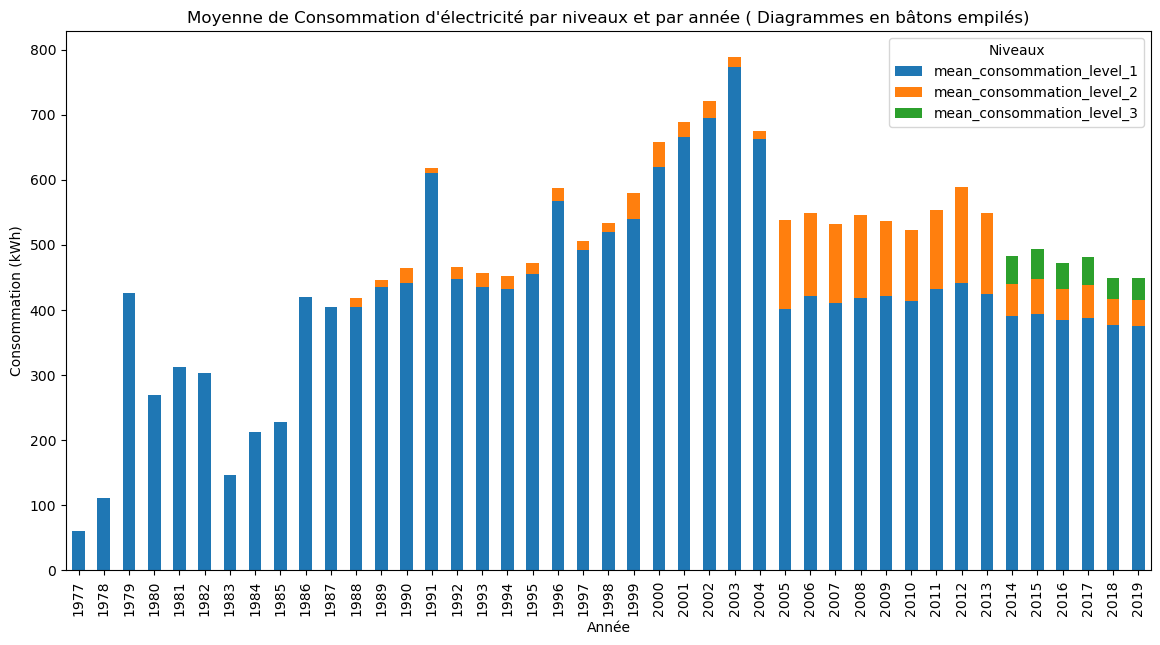

In [69]:
df_yearly.set_index('year')[['mean_consommation_level_1', 'mean_consommation_level_2', 'mean_consommation_level_3']].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Moyenne de Consommation d\'électricité par niveaux et par année ( Diagrammes en bâtons empilés)')
plt.xlabel('Année')
plt.ylabel('Consommation (kWh)')
plt.legend(title='Niveaux')
plt.show()

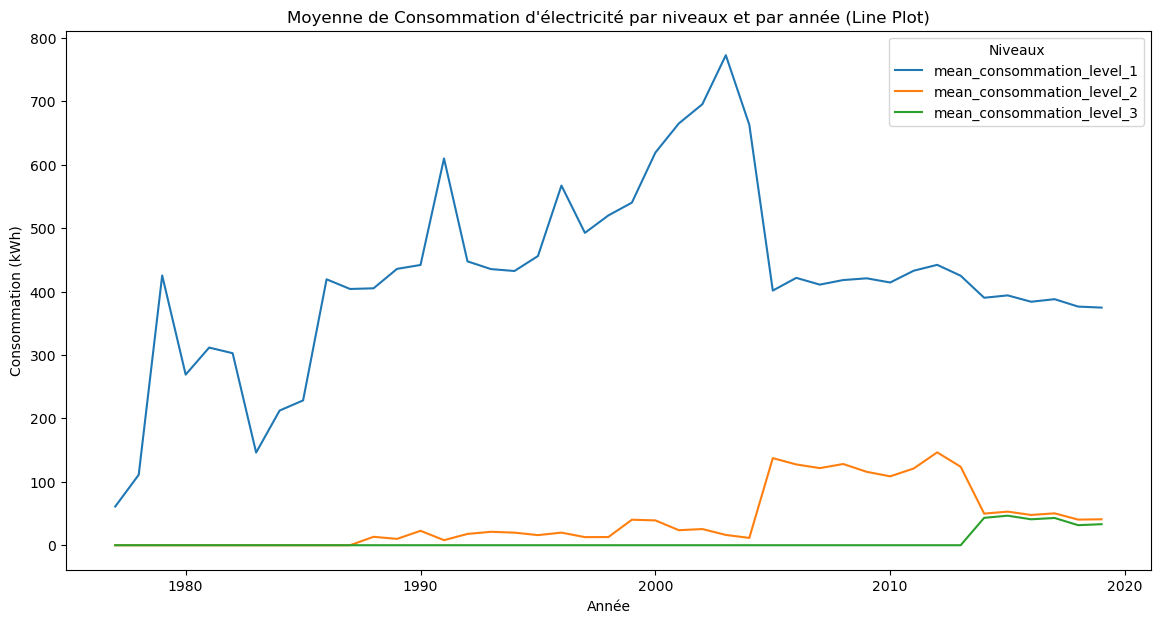

In [70]:
df_yearly.plot(x='year', y=['mean_consommation_level_1', 'mean_consommation_level_2', 'mean_consommation_level_3'], figsize=(14, 7))
plt.title('Moyenne de Consommation d\'électricité par niveaux et par année (Line Plot)')
plt.xlabel('Année')
plt.ylabel('Consommation (kWh)')
plt.legend(title='Niveaux')
plt.show()

In [71]:
aux_data = {
    11: "Type A",
    10: "Type B"
}

broadcast_aux_data = spark.sparkContext.broadcast(aux_data)

def map_tarif_type(tarif_type):
    return broadcast_aux_data.value.get(tarif_type, "Unknown")


map_tarif_type_udf = udf(map_tarif_type, StringType())

df_with_tarif_name = df_spark.withColumn("tarif_name", map_tarif_type_udf(col("tarif_type")))

In [72]:
def join_operation(df):
    return df.join(df_with_tarif_name, "tarif_type")

In [73]:
start = time.time()
join_operation(df_with_tarif_name)
end = time.time()
temps7 = end - start
print(temps7)

0.7451686859130859


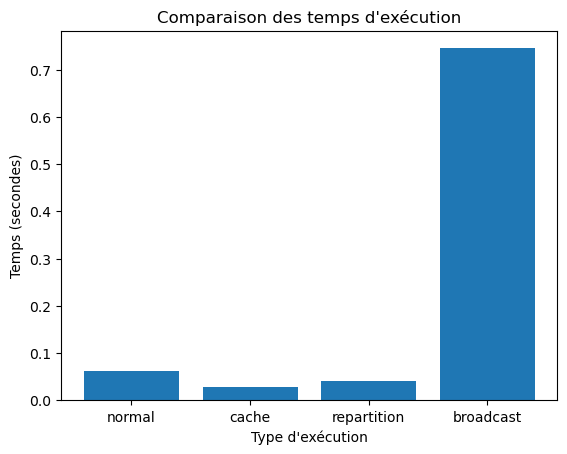

In [74]:
temps_exec = [temps4, temps5, temps6, temps7]
etiquettes = ['normal', 'cache', 'repartition','broadcast']
plt.bar(etiquettes, temps_exec)
plt.title('Comparaison des temps d\'exécution')
plt.xlabel('Type d\'exécution')
plt.ylabel('Temps (secondes)')

plt.show()

# **Utilisation de Kafka pour le Streaming des Données en Temps Réel 🌐**

In [77]:
producer = KafkaProducer(bootstrap_servers='ed-kafka:29092')
df_spark = df_spark.limit(5)

df_spark = df_spark.toPandas()

for index, row in df_spark.iterrows():
    row_str = '\t'.join(row.astype(str))
    producer.send('device-data', value=row_str.encode('utf-8'))
    time.sleep(0.1)

producer.flush()

df_spark

NoBrokersAvailable: NoBrokersAvailable

In [ ]:
kafka_df = (
    spark
    .readStream
    .format("kafka")
    .option("kafka.bootstrap.servers", "ed-kafka:29092")
    .option("subscribe", "device-data")
    .option("startingOffsets", "earliest")
    .load()
)

In [ ]:
value_df = kafka_df.selectExpr("CAST(value AS STRING)")

In [ ]:
csv_df = value_df.select(split(value_df["value"], "\t").alias("data"))

In [ ]:
final_df = csv_df.select(
    col("data").getItem(0).alias("invoice_date"),
    col("data").getItem(1).alias("tarif_type"),
    col("data").getItem(2).alias("consommation_level_1"),
    col("data").getItem(3).alias("consommation_level_2"),
    col("data").getItem(4).alias("consommation_level_3"),
    col("data").getItem(5).alias("consommation_level_4"),
    col("data").getItem(6).alias("old_index"),
    col("data").getItem(7).alias("new_index"),
    col("data").getItem(8).alias("months_number"),
)

In [ ]:
def plot_data(df):
    df = df.withColumn('year', year(col('invoice_date')))
    grouped_df = df.groupBy('year').sum(
        'consommation_level_1',
        'consommation_level_2',
        'consommation_level_3'
    ).orderBy('year')
    pdf = grouped_df.toPandas()
    pdf = pdf.sort_values(by='year')
    plt.figure(figsize=(10, 6))
    plt.plot(pdf['year'], pdf['sum(consommation_level_1)'], label='Consommation Level 1')
    plt.plot(pdf['year'], pdf['sum(consommation_level_2)'], label='Consommation Level 2')
    plt.plot(pdf['year'], pdf['sum(consommation_level_3)'], label='Consommation Level 3')
    plt.xlabel('Year')
    plt.ylabel('Consumption Level')
    plt.title('Consumption Levels by Year')
    plt.legend()
    plt.show()

In [ ]:
def tracer_consommation_par_tarif(df):
    grouped_df = df.groupBy('tarif_type').sum('consommation_level_1')
    pdf = grouped_df.toPandas()
    fig = px.bar(pdf, y='sum(consommation_level_1)', x='tarif_type', title='Niveau de Consommation 1 par Type de Tarif', labels={'sum(consommation_level_1)': 'Niveau de Consommation 1', 'tarif_type': 'Type de Tarif'})
    fig.show()

In [ ]:
def tracer_consommation_moyenne_mensuelle_par_tarif(df):
    df = df.withColumn('consommation_mensuelle', (col('new_index') - col('old_index')) / col('months_number'))
    grouped_df = df.groupBy('tarif_type').avg('consommation_mensuelle')
    pdf = grouped_df.toPandas()
    fig = px.bar(pdf, x='tarif_type', y='avg(consommation_mensuelle)', title='Consommation Mensuelle Moyenne par Type de Tarif', labels={'avg(consommation_mensuelle)': 'Consommation Mensuelle Moyenne', 'tarif_type': 'Type de Tarif'})
    fig.update_xaxes(tickmode='array', tickvals=pdf['tarif_type'])
    fig.show()

In [ ]:
def cast_columns(df):
    return df \
        .withColumn("invoice_date", col("invoice_date").cast(TimestampType())) \
        .withColumn("tarif_type", col("tarif_type").cast(IntegerType())) \
        .withColumn("consommation_level_1", col("consommation_level_1").cast(IntegerType())) \
        .withColumn("consommation_level_2", col("consommation_level_2").cast(IntegerType())) \
        .withColumn("consommation_level_3", col("consommation_level_3").cast(IntegerType())) \
        .withColumn("consommation_level_4", col("consommation_level_4").cast(IntegerType())) \
        .withColumn("old_index", col("old_index").cast(IntegerType())) \
        .withColumn("new_index", col("new_index").cast(IntegerType())) \
        .withColumn("months_number", col("months_number").cast(IntegerType()))

In [ ]:
global_df = None
def process_batch(batch_df, batch_id):
    global global_df
    print(f"Batch {batch_id}")
    batch_df = cast_columns(batch_df)
    if global_df is None:
        global_df = batch_df
    else:
        global_df = global_df.union(batch_df)

    global_df.show(truncate=False)
    plot_data(global_df)
    tracer_consommation_par_tarif(global_df)
    tracer_consommation_moyenne_mensuelle_par_tarif(global_df)
final_df.printSchema()

In [ ]:
query = (
    final_df
    .writeStream
    .outputMode("append")
    .foreachBatch(process_batch)
    .start()
)

query.awaitTermination()